# Projekt - Machine Learing in Manufacturing

#### Dozent: Felix Müller

#### Programmierer: Simon Koeller, Johannes Lehner, Hans-Joachim Redeker

## Projektthema: Verschleißvorhersage von Kugellager mit Hilfe von KI-Algorithmen auf Basis von mehreren Datensätzen

#### Bei den Datensätzen handelt es sich um Daten, die mit Hilfe von Beschleunigung-Sensoren erfasst werden, welche horizontal und verrtikal an den untersuchten Kugellagern angebracht sind. 

#### Die Daten werdeen mit einer Abtrastfrequenz von 25,6 kHz erfasst.





##### Aufnahmeparameter:

Aufnahmefrequenz: 25.6 kHz

Aufnahmeintervall: alle 10s

Aufnahmedauer: 0..1s

2560 Samples pro Zyklus


##### Der Lösungsansatz ist modular aufgebaut und beinhaltet Modul 1 Data Preperation und Modul 2 Models

## Modul 1: Data Preperation

#### In diesem Modul geht es um die Datenvorverarbeitung und Aufbereitung um sie später in Modul 2 für das Training und die Vorhersage der Modelle zu nutzen.

### 1. Schritt: Import der Libraries 

Es werden alle notwendige Libraries die für die Bearbeitung der Daten notwenig sind importiert. 

In [4]:
#Import the required libraries
#Import pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, time, date
from sklearn.preprocessing import StandardScaler

from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.feature_extraction import extract_features

### 2. Schritt Konvertierung der csv-Dateien in pickele- Dateien 

Die Datensätze werden als csv-Dateien eingelesen und schrittweise in pickele Dateien umgewandelt um den Speicherplatz zu veringern und die Performance beim Einlesen und weiterer Verarbeitung zu beschleunigen.

Dieser Schritt ist von Vorteil, da sie auch in anderen modulen eingelesen werden müssen.

In [11]:
#Function to read and merge the csv files per Bearing
def read_data_from_folder(folder_path, column_names, signalType):
    """Loads all csv files starting with acc and merges them into one dataset

    Args:
        column names (string): List of column names, how the columns should be named.
        folder_path (string): The path to the the csv_folder.
        signalType (string): Search parameter

    Returns:
        input_df (pandas dataframe): The complete dataset de acc data with predefined columns .
    """
    input_df = pd.DataFrame(columns=column_names)
    signalType_files = [(file_name, os.path.join(folder_path, file_name)) for file_name in os.listdir(folder_path) if file_name.startswith(signalType) and file_name.endswith(".csv")]
    for file_name, file_path in signalType_files:
        df = pd.read_csv(file_path, header=None, names=column_names[1:])
        folder_name = os.path.basename(folder_path)
        df[column_names[0]] = folder_name
        input_df = pd.concat([input_df, df])
    return input_df

In [3]:
#LEARNING_BASE_PATH = r"C:\HS AlbSig\2.Semester\Projekt - Machine Learning in Manufacturing\Data\ieee-phm-2012-data-challenge-dataset-master\Learning_set"
#TESTING_BASE_PATH = r"C:\HS AlbSig\2.Semester\Projekt - Machine Learning in Manufacturing\Data\ieee-phm-2012-data-challenge-dataset-master\Test_set"

OUTPUT_BASE_PATH = r"C:\HS AlbSig\2.Semester\Projekt - Machine Learning in Manufacturing\Data\Output_Folder\NewOutputFolder"

#Learning Set
#BEARING1_1_PATH = os.path.join(LEARNING_BASE_PATH, "Bearing1_1")
#BEARING1_2_PATH = os.path.join(LEARNING_BASE_PATH, "Bearing1_2")
#BEARING2_1_PATH = os.path.join(LEARNING_BASE_PATH, "Bearing2_1")
#BEARING2_2_PATH = os.path.join(LEARNING_BASE_PATH, "Bearing2_2")
#BEARING3_1_PATH = os.path.join(LEARNING_BASE_PATH, "Bearing3_1")
#BEARING3_2_PATH = os.path.join(LEARNING_BASE_PATH, "Bearing3_2")

PICKLE_BEARING1_1_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_1.pkl")
PICKLE_BEARING1_2_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_2.pkl")
PICKLE_BEARING2_1_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_1.pkl")
PICKLE_BEARING2_2_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_2.pkl")
PICKLE_BEARING3_1_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing3_1.pkl")
PICKLE_BEARING3_2_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing3_2.pkl")

#Test Set
#BEARING1_3_PATH = os.path.join(TESTING_BASE_PATH, "Bearing1_3")
#BEARING1_4_PATH = os.path.join(TESTING_BASE_PATH, "Bearing1_4")
#BEARING1_5_PATH = os.path.join(TESTING_BASE_PATH, "Bearing1_5")
#BEARING1_6_PATH = os.path.join(TESTING_BASE_PATH, "Bearing1_6")
#BEARING1_7_PATH = os.path.join(TESTING_BASE_PATH, "Bearing1_7")
#BEARING2_3_PATH = os.path.join(TESTING_BASE_PATH, "Bearing2_3")
#BEARING2_4_PATH = os.path.join(TESTING_BASE_PATH, "Bearing2_4")
#BEARING2_5_PATH = os.path.join(TESTING_BASE_PATH, "Bearing2_5")
#BEARING2_6_PATH = os.path.join(TESTING_BASE_PATH, "Bearing2_6")
#BEARING2_7_PATH = os.path.join(TESTING_BASE_PATH, "Bearing2_7")
#BEARING3_3_PATH = os.path.join(TESTING_BASE_PATH, "Bearing3_3")

PICKLE_BEARING1_3_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_3.pkl")
PICKLE_BEARING1_4_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_4.pkl")
PICKLE_BEARING1_5_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_5.pkl")
PICKLE_BEARING1_6_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_6.pkl")
PICKLE_BEARING1_7_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_7.pkl")
PICKLE_BEARING2_3_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_3.pkl")
PICKLE_BEARING2_4_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_4.pkl")
PICKLE_BEARING2_5_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_5.pkl")
PICKLE_BEARING2_6_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_6.pkl")
PICKLE_BEARING2_7_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_7.pkl")
PICKLE_BEARING3_3_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing3_3.pkl")

#Spaltennamen für die DataFrames
COLUMN_NAMES_ACC = ["bearingName", "hour", "minute", "second", "microsecond", "horizontalAcceleration", "verticalAcceleration"]


In [4]:
#Learning Set
#Load and merge all csv data of a Bearing

#bearing1_1_df = read_data_from_folder(BEARING1_1_PATH, COLUMN_NAMES_ACC, 'acc')
#bearing1_2_df = read_data_from_folder(BEARING1_2_PATH, COLUMN_NAMES_ACC, 'acc')
#bearing2_1_df = read_data_from_folder(BEARING2_1_PATH, COLUMN_NAMES_ACC, 'acc')
#bearing2_2_df = read_data_from_folder(BEARING2_2_PATH, COLUMN_NAMES_ACC, 'acc')
#bearing3_1_df = read_data_from_folder(BEARING3_1_PATH, COLUMN_NAMES_ACC, 'acc')
#bearing3_2_df = read_data_from_folder(BEARING3_2_PATH, COLUMN_NAMES_ACC, 'acc')

In [5]:
#Test Set
#Load and merge all csv data of a Bearing

#Bearing1_3_df = read_data_from_folder(BEARING1_3_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing1_4_df = read_data_from_folder(BEARING1_4_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing1_5_df = read_data_from_folder(BEARING1_5_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing1_6_df = read_data_from_folder(BEARING1_6_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing1_7_df = read_data_from_folder(BEARING1_7_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing2_3_df = read_data_from_folder(BEARING2_3_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing2_4_df = read_data_from_folder(BEARING2_4_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing2_5_df = read_data_from_folder(BEARING2_5_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing2_6_df = read_data_from_folder(BEARING2_6_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing2_7_df = read_data_from_folder(BEARING2_7_PATH, COLUMN_NAMES_ACC, 'acc')
#Bearing3_3_df = read_data_from_folder(BEARING3_3_PATH, COLUMN_NAMES_ACC, 'acc')

In [6]:
#Conversion to pickle files (Learning Set)

#bearing1_1_df.to_pickle(PICKLE_BEARING1_1_PATH)
#bearing1_2_df.to_pickle(PICKLE_BEARING1_2_PATH)
#bearing2_1_df.to_pickle(PICKLE_BEARING2_1_PATH)
#bearing2_2_df.to_pickle(PICKLE_BEARING2_2_PATH)
#bearing3_1_df.to_pickle(PICKLE_BEARING3_1_PATH)
#bearing3_2_df.to_pickle(PICKLE_BEARING3_2_PATH)

In [7]:
#Conversion to pickle files (Test Set)

#Bearing1_3_df.to_pickle(PICKLE_BEARING1_3_PATH)
#Bearing1_4_df.to_pickle(PICKLE_BEARING1_4_PATH)
#Bearing1_5_df.to_pickle(PICKLE_BEARING1_5_PATH)
#Bearing1_6_df.to_pickle(PICKLE_BEARING1_6_PATH)
#Bearing1_7_df.to_pickle(PICKLE_BEARING1_7_PATH)
#Bearing2_3_df.to_pickle(PICKLE_BEARING2_3_PATH)
#Bearing2_4_df.to_pickle(PICKLE_BEARING2_4_PATH)
#Bearing2_5_df.to_pickle(PICKLE_BEARING2_5_PATH)
#Bearing2_6_df.to_pickle(PICKLE_BEARING2_6_PATH)
#Bearing2_7_df.to_pickle(PICKLE_BEARING2_7_PATH)
#Bearing3_3_df.to_pickle(PICKLE_BEARING3_3_PATH)

#### Einlesen der pickele Dateien

Nach der Umwandlung können die Datensätzen nun schneller eingelesen werden.

In [8]:
#Load of the learning set
bearing1_1_df = pd.read_pickle(PICKLE_BEARING1_1_PATH)
bearing1_2_df = pd.read_pickle(PICKLE_BEARING1_2_PATH)
bearing2_1_df = pd.read_pickle(PICKLE_BEARING2_1_PATH)
bearing2_2_df = pd.read_pickle(PICKLE_BEARING2_2_PATH)
bearing3_1_df = pd.read_pickle(PICKLE_BEARING3_1_PATH)
bearing3_2_df = pd.read_pickle(PICKLE_BEARING3_2_PATH)

In [9]:
#Load of the test set
Bearing1_3_df = pd.read_pickle(PICKLE_BEARING1_3_PATH)
Bearing1_4_df = pd.read_pickle(PICKLE_BEARING1_4_PATH)
Bearing1_5_df = pd.read_pickle(PICKLE_BEARING1_5_PATH)
Bearing1_6_df = pd.read_pickle(PICKLE_BEARING1_6_PATH)
Bearing1_7_df = pd.read_pickle(PICKLE_BEARING1_7_PATH)
Bearing2_3_df = pd.read_pickle(PICKLE_BEARING2_3_PATH)
Bearing2_4_df = pd.read_pickle(PICKLE_BEARING2_4_PATH)
Bearing2_5_df = pd.read_pickle(PICKLE_BEARING2_5_PATH)
Bearing2_6_df = pd.read_pickle(PICKLE_BEARING2_6_PATH)
Bearing2_7_df = pd.read_pickle(PICKLE_BEARING2_7_PATH)
Bearing3_3_df = pd.read_pickle(PICKLE_BEARING3_3_PATH)

In [10]:
bearing1_1_df.head()

,bearingName,hour,minute,second,microsecond,horizontalAcceleration,verticalAcceleration
0,Bearing1_1,9,39,39,65664.0,0.552,-0.146
1,Bearing1_1,9,39,39,65703.0,0.501,-0.480
2,Bearing1_1,9,39,39,65742.0,0.138,0.435
3,Bearing1_1,9,39,39,65781.0,-0.423,0.240
4,Bearing1_1,9,39,39,65820.0,-0.802,0.020


### 3. Schritt Datenaufbereitung

Der Programmblock erstellt aus den einzelnen Zeitspalten eine Spalte. Danach wird aus der horizontalen und der vertikalen mit Hilfe des Satzes des Pythagoras die resultierende Kraft berechnet.
Abhängig von den G-Werten in dieser Spalte wird eine weitere Spalte hinzugefügt, welche die Werte in defekt und nicht defekt klassifiziert. Mit dieser Spalte 'Defekt' kann die RUL jedes Kugellagers berechnet werden und als Spalte 'RUL' dem Datensatz hinzugefügt werden. AUf Basis dieser Spalte wird eine weitere Spalte 'Status' hinzugefügt. Hier werden die Lagerzustände auf Basis der RUL in drei definierte Bereiche unterteilt.
Die letzte Spalte 'ID' wird für den nächsten Schritt Feature Extraction benötigt. Zu guter Letzt werden alle SPalten, die für die weitere Auswertung nicht benötigt werden aus den Datensätzen entfernt.


##### Datensatz Bearing1_1

In [11]:
#Definition of the dataframes 
Bearing = bearing1_1_df

# Create a new column 'timestamp' with the timestamp in microseconds

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check = check_defect(Bearing)

# A new column RUL with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)

bearing1_1_df_dp = Bearing



Das Kugellager geht bei 8:41:42:262970 kaputt


,timestamp,totalAcceleration,totalAccelerationMovingAverage,totalAcceleration_stan,Defect,RUL,Status,ID
0,34779065664,0.570982,0.633356,-0.100987,0,27650062966,uncritical,1
1,34779065703,0.693831,0.633356,-0.100987,0,27650062927,uncritical,1
2,34779065742,0.456365,0.633356,-0.100987,0,27650062888,uncritical,1
3,34779065781,0.486342,0.633356,-0.100987,0,27650062849,uncritical,1
4,34779065820,0.802249,0.633356,-0.100987,0,27650062810,uncritical,1


##### Datensatz Bearing1_2

In [13]:
# Definition of the dataframes 
Bearing = bearing1_2_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
  """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]


# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%

Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
bearing1_2_df_dp = Bearing



Das Kugellager geht bei 3:24:50:38050 kaputt


##### Datensatz Bearing2_1

In [14]:
# Definition of the dataframes 
Bearing = bearing2_1_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.

Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
  """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
bearing2_1_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing2_2

In [15]:
# Definition of the dataframes 
Bearing = bearing2_2_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
  """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]


# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%

Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
bearing2_2_df_dp = Bearing

Das Kugellager geht bei 3:12:40:82970 kaputt


##### Datensatz Bearing3_1

In [16]:
# Definition of the dataframes 
Bearing = bearing3_1_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%

Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
bearing3_1_df_dp = Bearing

Das Kugellager geht bei 2:22:10:63120 kaputt


##### Datensatz Bearing3_2

In [17]:
# Definition of the dataframes 
Bearing = bearing3_2_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%

Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
bearing3_2_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Visualisierung der Learning-Datensätze

KeyboardInterrupt: 

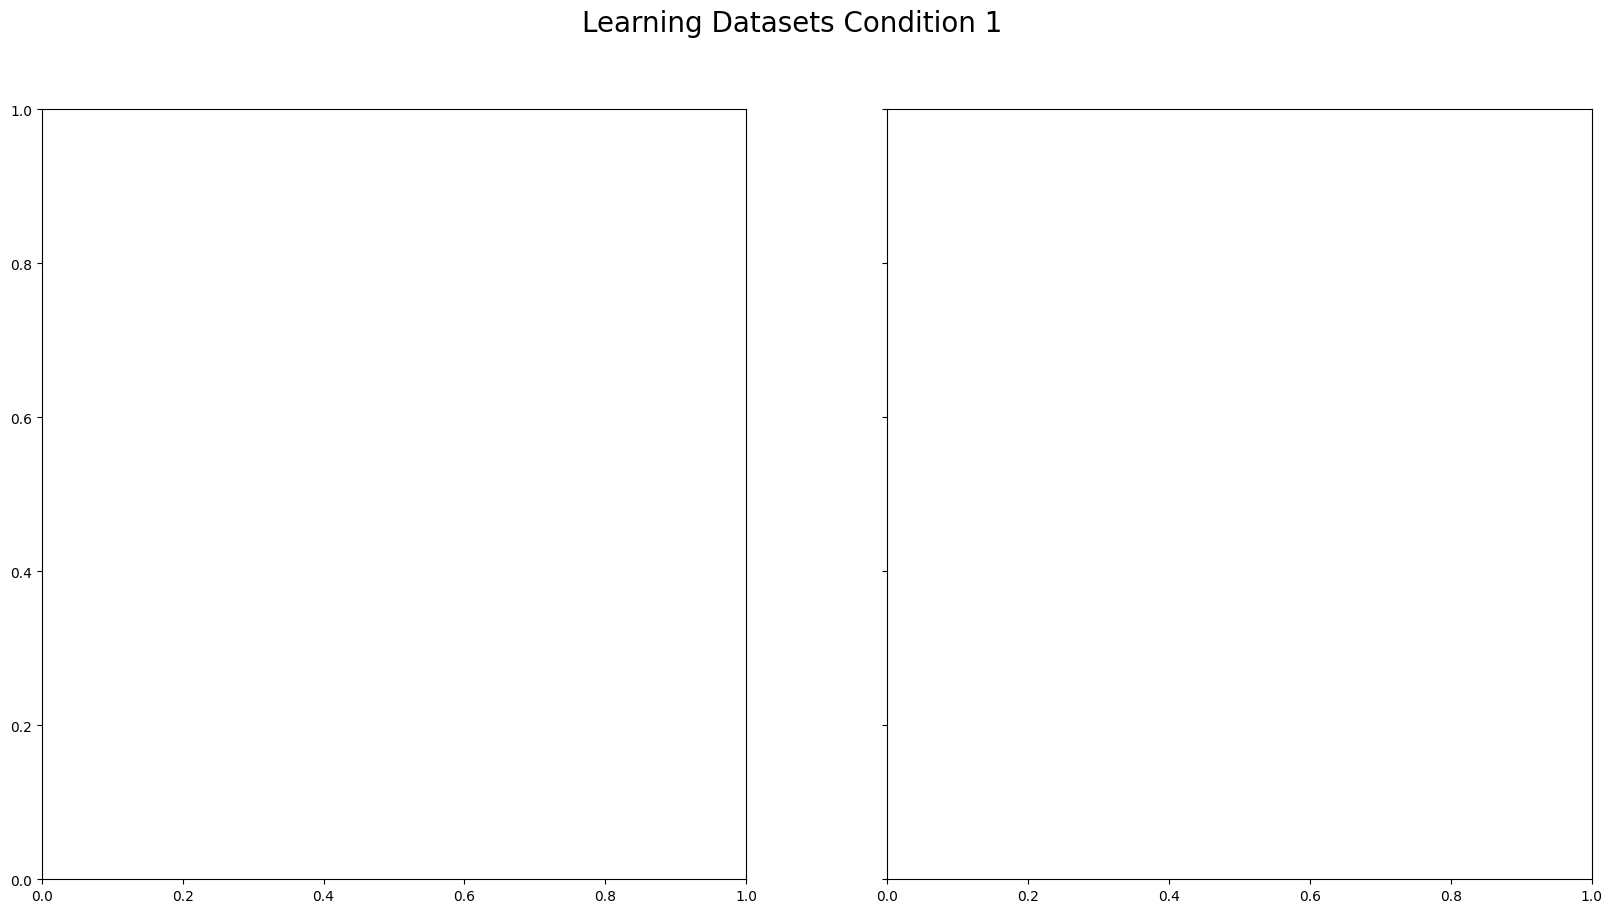

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
fig.suptitle('Learning Datasets Condition 1', fontsize=20)

#Bearing1_1
sns.lineplot(ax=axes[0], x=bearing1_1_df_dp['timestamp'], y=bearing1_1_df_dp['totalAccelerationMovingAverage'], data=bearing1_1_df_dp[::5000])
sns.set_theme(style="darkgrid")
axes[0].set_title('Bearing1_1')

#Bearing1_2
sns.lineplot(ax=axes[1], x=bearing1_2_df_dp['timestamp'], y=bearing1_2_df_dp['totalAccelerationMovingAverage'], data=bearing1_2_df_dp[::5000])
sns.set_theme(style="darkgrid")
axes[1].set_title('Bearing1_2')

plt.show()

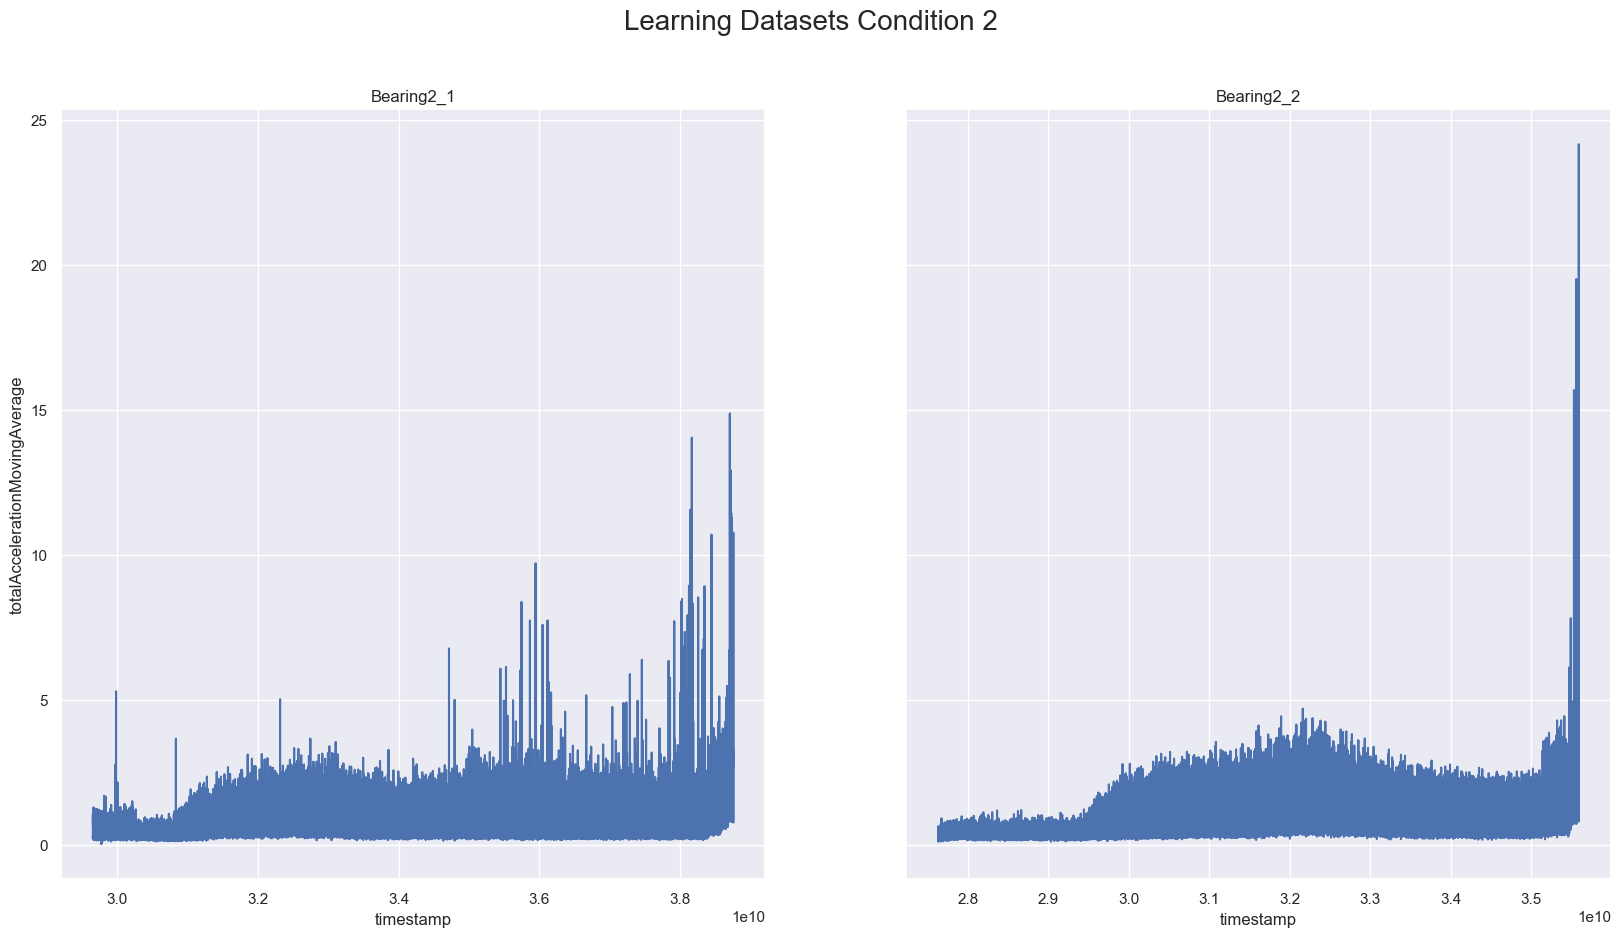

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
fig.suptitle('Learning Datasets Condition 2', fontsize=20)

#Bearing2_1
sns.lineplot(ax=axes[0], x=bearing2_1_df_dp['timestamp'], y=bearing2_1_df_dp['totalAccelerationMovingAverage'], data=bearing2_1_df[::1000])
sns.set_theme(style="darkgrid")
axes[0].set_title('Bearing2_1')

#Bearing2_2
sns.lineplot(ax=axes[1], x=bearing2_2_df_dp['timestamp'], y=bearing2_2_df_dp['totalAccelerationMovingAverage'], data=bearing2_2_df[::1000])
sns.set_theme(style="darkgrid")
axes[1].set_title('Bearing2_2')

plt.show()

Text(0.5, 1.0, 'Bearing3_2')

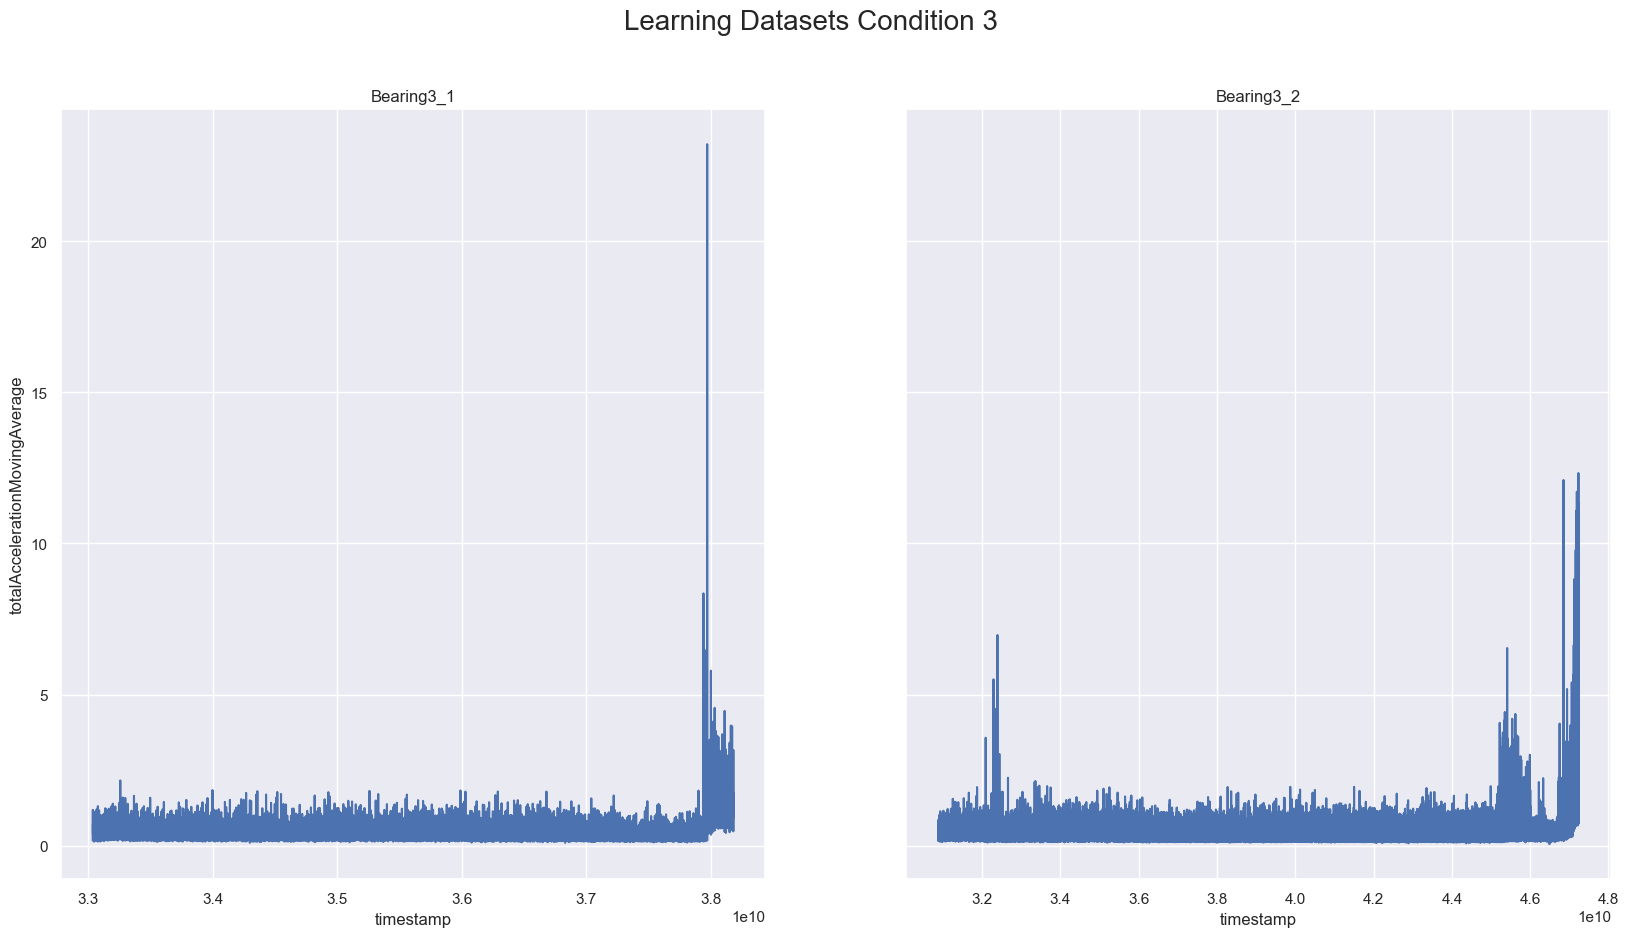

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
fig.suptitle('Learning Datasets Condition 3', fontsize=20)

#Bearing3_1
sns.lineplot(ax=axes[0], x=bearing3_1_df_dp['timestamp'], y=bearing3_1_df_dp['totalAccelerationMovingAverage'], data=bearing3_1_df[::100])
sns.set_theme(style="darkgrid")
axes[0].set_title('Bearing3_1')

#Bearing3_2
sns.lineplot(ax=axes[1], x=bearing3_2_df_dp['timestamp'], y=bearing3_2_df_dp['totalAccelerationMovingAverage'], data=bearing3_2_df[::100])
sns.set_theme(style="darkgrid")
axes[1].set_title('Bearing3_2')

#plt.show()

### Testdatensätze

##### Datensatz Bearing1_3

In [ ]:
# Definition of the dataframes 
Bearing = Bearing1_3_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=100).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing1_3_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing1_4

In [ ]:
# Definition of the dataframes 
Bearing = Bearing1_4_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing1_4_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing1_5

In [ ]:
# Definition of the dataframes 
Bearing = Bearing1_5_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.

Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=100).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing1_5_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing1_6

In [ ]:
# Definition of the dataframes 
Bearing = Bearing1_6_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing1_6_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing1_7

In [ ]:
# Definition of the dataframes 
Bearing = Bearing1_7_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing1_7_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing2_3

In [ ]:
# Definition of the dataframes 
Bearing = Bearing2_3_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])


# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing2_3_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing2_4

In [ ]:
# Definition of the dataframes 
Bearing = Bearing2_4_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing2_4_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing2_5

In [ ]:
# Definition of the dataframes 
Bearing = Bearing2_5_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing2_5_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing2_6

In [ ]:
# Definition of the dataframes 
Bearing = Bearing2_6_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%

Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing2_6_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing2_7

In [ ]:
# Definition of the dataframes 
Bearing = Bearing2_7_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing2_7_df_dp = Bearing

Das Kugellager geht nicht kaputt


##### Datensatz Bearing3_3

In [ ]:
# Definition of the dataframes 
Bearing =  Bearing3_3_df

#Build timestamp
convert_to_microseconds = lambda df: df.assign(timestamp=df['hour'] * 3600000000 + df['minute'] * 60000000 + df['second'] * 1000000 + df['microsecond'])
Bearing = convert_to_microseconds(Bearing)
Bearing['timestamp'] = Bearing['timestamp'].astype("int64")

#Using the Pythagorean theorem, a new column 'totalAcceleration' is created from the two columns 'horizontalAcceleration' and 'verticalAcceleration'.
Bearing['totalAcceleration'] = np.sqrt(Bearing['horizontalAcceleration']**2 + Bearing['verticalAcceleration']**2)

#Create a new column 'totalAccelerationMovingAverage' with the moving average of the column 'totalAcceleration'
Bearing['totalAccelerationMovingAverage'] = Bearing['totalAcceleration'].rolling(window=10).mean()

#Standardization the 'totalAccelerationMovingAverage' column using the StandardScaler function
scaler = StandardScaler()
Bearing["totalAcceleration_stan"] = scaler.fit_transform(Bearing[["totalAccelerationMovingAverage"]])

# A new column 'Defect' with the value 1 if the 'totalAccelerationMovingAverage' is greater than 20 and 0 if not
Bearing['Defect'] = np.where(Bearing['totalAccelerationMovingAverage'] > 20, 1, 0)

#The data set is checked to see whether there is a defect
def check_defect(df):
    """The function checks if there is a 1 in the Defect column or not 
    and returns the result as a Boolean.

    Args:
        df (pandas dataframe): Data set to be checked.
        
    Returns:
        True if there is a 1 in the Defect column, False if not.
    """
    if (df['Defect'] == 1).any():
        return True
    else:
        return False

bearing_check=check_defect(Bearing)

# A new column RULE with the remaining life of the bearing
if bearing_check == True:
    for index, row in Bearing.iterrows():
        if row['Defect'] == 1: 
            breakpoint = int(row['timestamp'])
            #Function that converts the breakpoint_train variable back into the hour, minutes, seconds, and microsecond 
            def timestamp_to_time(breakpoint):
                """Function converts timestamp from microseconds back to hours, minutes, seconds and microseconds

                Args:
                    breakpoint (int): Time at which the bearing comes over 20g and is therefore broken
        
                Returns:breakpoint in format hour:minute:second:microsecond
                    """
                dt = datetime.fromtimestamp(breakpoint/1000000)
                return str(dt.hour)+':'+str(dt.minute)+':'+ str(dt.second)+':'+str(dt.microsecond)
            difference = breakpoint-Bearing["timestamp"].min()
            ergebnis= timestamp_to_time(difference)
            print('Das Kugellager geht bei ' + str(ergebnis) + ' kaputt')
            break
        else:
            continue
else:
    breakpoint = Bearing["timestamp"].max()
    print('Das Kugellager geht nicht kaputt')

Bearing["RUL"] = breakpoint - Bearing["timestamp"]

# Status column with 'failure soon' in the value range of 0% and 20% of the RUL 'wear recognizable' in the value range of greater than 20% to 40% and 'uncritical' in the value range of greater than 40% to 100%
Bearing['Status'] = np.where(Bearing['RUL'] <= 0.2 * Bearing['RUL'].max(), 'failure soon', 0)
Bearing['Status'] = np.where((Bearing['RUL'] > 0.2 * Bearing['RUL'].max()) & (Bearing['RUL'] <= 0.4 * Bearing['RUL'].max()), 'wear recognizable', Bearing['Status'])
Bearing['Status'] = np.where((Bearing['RUL'] > 0.4 * Bearing['RUL'].max()) & (Bearing['RUL'] <= Bearing['RUL'].max()), 'uncritical', Bearing['Status'])

# Create a column named ID and add it as the first column. The index should increase by 1 after 1000 values
Bearing['ID'] = np.arange(len(Bearing)) // 1000 + 1

#Backward fill the NaN-Values
Bearing = Bearing.bfill()

#Remove of all unneeded columns
Bearing=Bearing.drop(['bearingName','hour', 'minute', 'second', 'microsecond', 'horizontalAcceleration', 'verticalAcceleration'], axis=1)
Bearing3_3_df_dp = Bearing

Das Kugellager geht nicht kaputt


#### Visualisierung der Learning-Datensätze

##### Condition 1

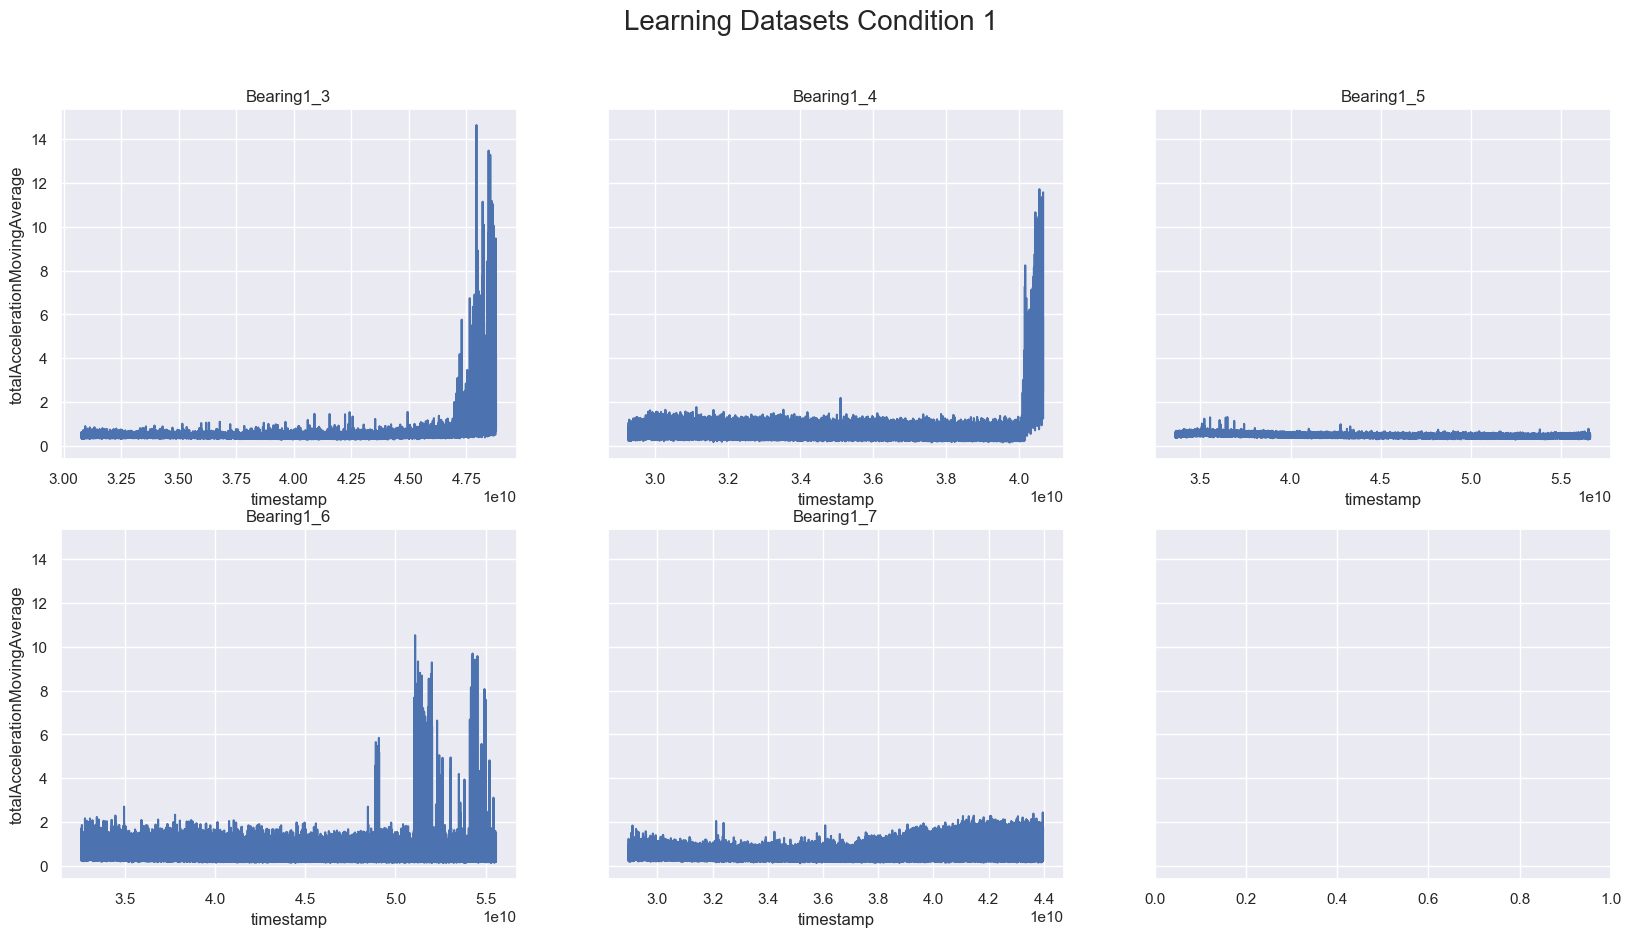

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharey=True)
fig.suptitle('Learning Datasets Condition 1', fontsize=20)

#Bearing1_3
sns.lineplot(ax=axes[0,0], x=Bearing1_3_df_dp['timestamp'], y=Bearing1_3_df_dp['totalAccelerationMovingAverage'], data=Bearing1_3_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[0,0].set_title('Bearing1_3')

#Bearing1_4
sns.lineplot(ax=axes[0,1], x=Bearing1_4_df_dp['timestamp'], y=Bearing1_4_df_dp['totalAccelerationMovingAverage'], data=Bearing1_4_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[0,1].set_title('Bearing1_4')

#Bearing1_5
sns.lineplot(ax=axes[0,2], x=Bearing1_5_df_dp['timestamp'], y=Bearing1_5_df_dp['totalAccelerationMovingAverage'], data=Bearing1_5_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[0,2].set_title('Bearing1_5')

#Bearing1_6
sns.lineplot(ax=axes[1,0], x=Bearing1_6_df_dp['timestamp'], y=Bearing1_6_df_dp['totalAccelerationMovingAverage'], data=Bearing1_6_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[1,0].set_title('Bearing1_6')

#Bearing1_7
sns.lineplot(ax=axes[1,1], x=Bearing1_7_df_dp['timestamp'], y=Bearing1_7_df_dp['totalAccelerationMovingAverage'], data=Bearing1_7_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[1,1].set_title('Bearing1_7')

plt.show()

##### Condition 2

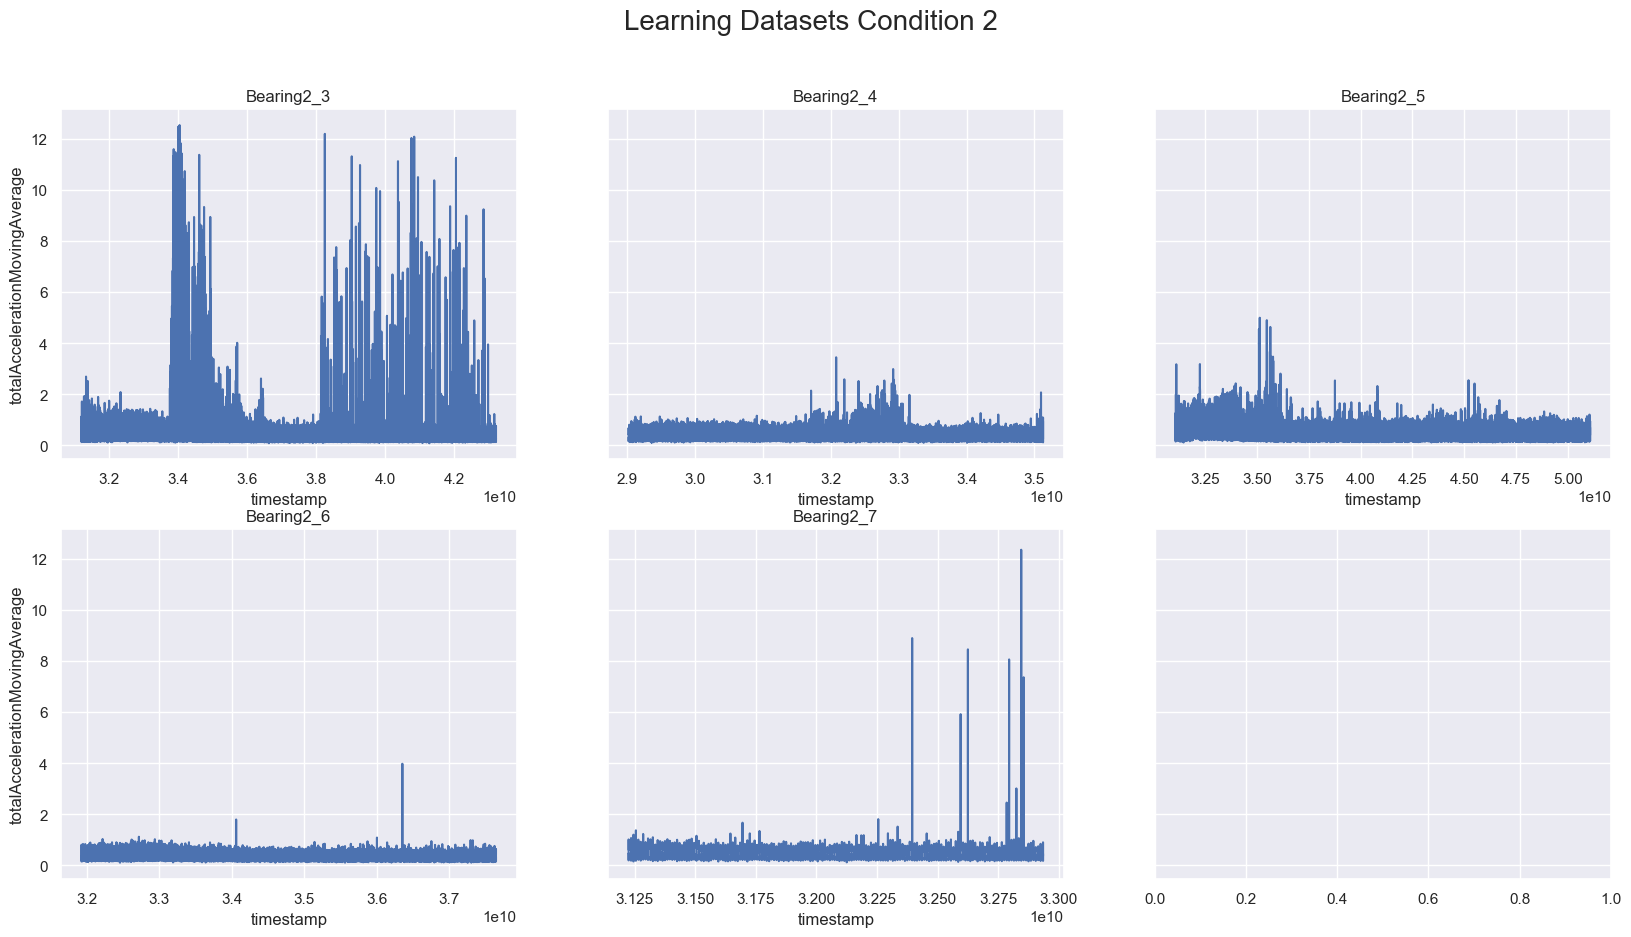

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharey=True)
fig.suptitle('Learning Datasets Condition 2', fontsize=20)

#Bearing2_3
sns.lineplot(ax=axes[0,0], x=Bearing2_3_df_dp['timestamp'], y=Bearing2_3_df_dp['totalAccelerationMovingAverage'], data=Bearing2_3_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[0,0].set_title('Bearing2_3')

#Bearing2_4
sns.lineplot(ax=axes[0,1], x=Bearing2_4_df_dp['timestamp'], y=Bearing2_4_df_dp['totalAccelerationMovingAverage'], data=Bearing2_4_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[0,1].set_title('Bearing2_4')

#Bearing2_5
sns.lineplot(ax=axes[0,2], x=Bearing2_5_df_dp['timestamp'], y=Bearing2_5_df_dp['totalAccelerationMovingAverage'], data=Bearing2_5_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[0,2].set_title('Bearing2_5')

#Bearing2_6
sns.lineplot(ax=axes[1,0], x=Bearing2_6_df_dp['timestamp'], y=Bearing2_6_df_dp['totalAccelerationMovingAverage'], data=Bearing2_6_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[1,0].set_title('Bearing2_6')

#Bearing2_7
sns.lineplot(ax=axes[1,1], x=Bearing2_7_df_dp['timestamp'], y=Bearing2_7_df_dp['totalAccelerationMovingAverage'], data=Bearing2_7_df_dp[::500])
sns.set_theme(style="darkgrid")
axes[1,1].set_title('Bearing2_7')


plt.show()

##### Condition 3

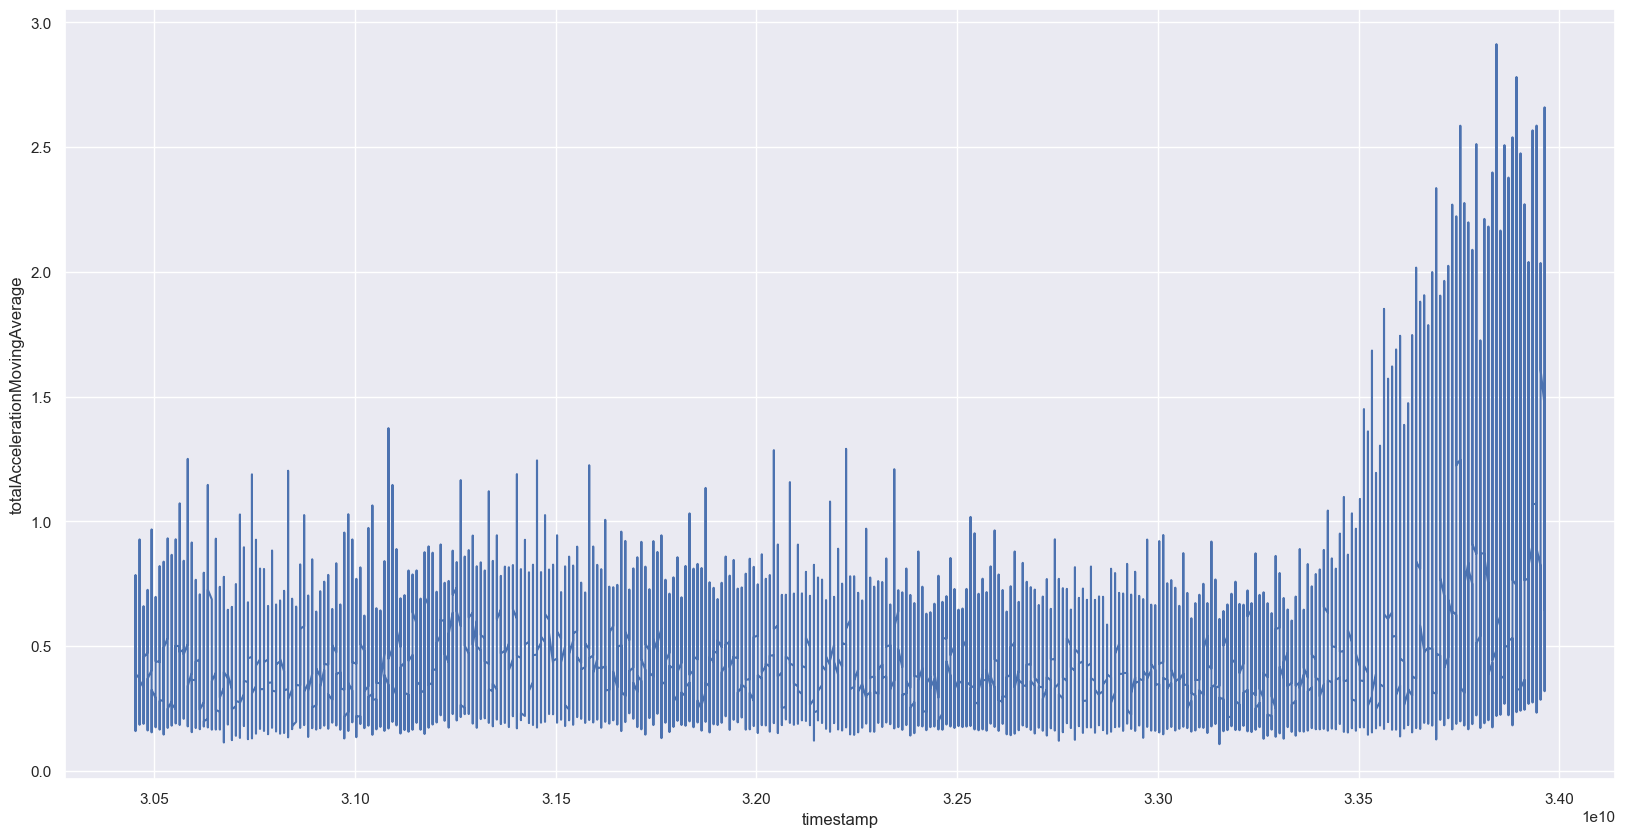

In [ ]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharey=True)

#Bearing31_3
sns.lineplot(x=Bearing3_3_df_dp['timestamp'], y=Bearing3_3_df_dp['totalAccelerationMovingAverage'], data=Bearing3_3_df_dp[::500])
sns.set_theme(style="darkgrid")
#axes[0,0].set_title('Bearing3_3')


plt.show()

### 4.Exportieren der erstellten Datensätzen

Die bearbeiteten Datensätzen werden nun als pickele-Dateien exportiert. Sie können nun in andere Module eingelesen werden und weiter verwendet werden ohne bei jeder Nutzung erneut das Programm durchlaufen zu müssen.

In [ ]:
#Exportieren der erstellten Dataframes als pickle-Datei

PREPERATED_BEARING1_1_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_1_df_dp.pkl")
bearing1_1_df_dp.to_pickle(PREPERATED_BEARING1_1_PATH)
PREPERATED_BEARING1_2_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_2_df_dp.pkl")
bearing1_2_df_dp.to_pickle(PREPERATED_BEARING1_2_PATH)
PREPERATED_BEARING2_1_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_1_df_dp.pkl")
bearing2_1_df_dp.to_pickle(PREPERATED_BEARING2_1_PATH)
PREPERATED_BEARING2_2_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_2_df_dp.pkl")
bearing2_2_df_dp.to_pickle(PREPERATED_BEARING2_2_PATH)
PREPERATED_BEARING3_1_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing3_5_df_dp.pkl")
bearing3_1_df_dp.to_pickle(PREPERATED_BEARING3_1_PATH)
PREPERATED_BEARING3_2_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing3_2_df_dp.pkl")
bearing3_2_df_dp.to_pickle(PREPERATED_BEARING3_2_PATH)

PREPERATED_BEARING1_3_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_3_df_dp.pkl")
Bearing1_3_df_dp.to_pickle(PREPERATED_BEARING1_3_PATH)
PREPERATED_BEARING1_4_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_4_df_dp.pkl")
Bearing1_4_df_dp.to_pickle(PREPERATED_BEARING1_4_PATH)
PREPERATED_BEARING1_5_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_5_df_dp.pkl")
Bearing1_5_df_dp.to_pickle(PREPERATED_BEARING1_5_PATH)
PREPERATED_BEARING1_6_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_6_df_dp.pkl")
Bearing1_6_df_dp.to_pickle(PREPERATED_BEARING1_6_PATH)
PREPERATED_BEARING1_7_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_7_df_dp.pkl")
Bearing1_7_df_dp.to_pickle(PREPERATED_BEARING1_7_PATH)
PREPERATED_BEARING2_3_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_3_df_dp.pkl")
Bearing2_3_df_dp.to_pickle(PREPERATED_BEARING2_3_PATH)
PREPERATED_BEARING2_4_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_4_df_dp.pkl")
Bearing2_4_df_dp.to_pickle(PREPERATED_BEARING2_4_PATH)
PREPERATED_BEARING2_5_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_5_df_dp.pkl")
Bearing2_5_df_dp.to_pickle(PREPERATED_BEARING2_5_PATH)
PREPERATED_BEARING2_6_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_6_df_dp.pkl")
Bearing2_6_df_dp.to_pickle(PREPERATED_BEARING2_6_PATH)
PREPERATED_BEARING2_7_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_7_df_dp.pkl")
Bearing2_7_df_dp.to_pickle(PREPERATED_BEARING2_7_PATH)
PREPERATED_BEARING3_3_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing3_3_df_dp.pkl")
Bearing3_3_df_dp.to_pickle(PREPERATED_BEARING3_3_PATH)


### 5. Feature Extraction

Bei der Feature Extraction wird mit Hilfe der Library tsfresh weitere Daten aus den bisherigen Daten generiert. Dies wird gemacht um weitere Daten zu erhalten mit denen man die Algorithmen trainieren kann ohne das Ergebnis zu verfälschen.

Es werden zum einen statistische Werte ermittelt wie Mittelwerte, Meridian, Maximums, Minimums, Varianz, usw. und zum andere weitere Daten aus dem Frequenzbereich

In [ ]:
#Feature Extraction with tsfresh

settings = MinimalFCParameters()

#Drop status + Defect-Column
bearing1_1_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
bearing1_2_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
bearing2_1_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
bearing2_2_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
bearing3_1_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
bearing3_2_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing1_3_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing1_4_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing1_5_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing1_6_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing1_7_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing2_3_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing2_4_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing2_5_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing2_6_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing2_7_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)
Bearing3_3_df_dp.drop(["Status", "Defect"], axis=1, inplace=True)

#Extraction for trainings data
bearing1_1_df_featureExtracted = extract_features(bearing1_1_df_dp, column_id="ID", default_fc_parameters=settings)
bearing1_2_df_featureExtracted = extract_features(bearing1_2_df_dp, column_id="ID", default_fc_parameters=settings)
bearing2_1_df_featureExtracted = extract_features(bearing2_1_df_dp, column_id="ID", default_fc_parameters=settings)
bearing2_2_df_featureExtracted = extract_features(bearing2_2_df_dp, column_id="ID", default_fc_parameters=settings)
bearing3_1_df_featureExtracted = extract_features(bearing3_1_df_dp, column_id="ID", default_fc_parameters=settings)
bearing3_2_df_featureExtracted = extract_features(bearing3_2_df_dp, column_id="ID", default_fc_parameters=settings)

#Extraction for test data
Bearing1_3_df_featureExtracted = extract_features(Bearing1_3_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing1_4_df_featureExtracted = extract_features(Bearing1_4_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing1_5_df_featureExtracted = extract_features(Bearing1_5_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing1_6_df_featureExtracted = extract_features(Bearing1_6_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing1_7_df_featureExtracted = extract_features(Bearing1_7_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing2_3_df_featureExtracted = extract_features(Bearing2_3_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing2_4_df_featureExtracted = extract_features(Bearing2_4_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing2_5_df_featureExtracted = extract_features(Bearing2_5_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing2_6_df_featureExtracted = extract_features(Bearing2_6_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing2_7_df_featureExtracted = extract_features(Bearing2_7_df_dp, column_id="ID", default_fc_parameters=settings)
Bearing3_3_df_featureExtracted = extract_features(Bearing3_3_df_dp, column_id="ID", default_fc_parameters=settings)


#Drop NaN-Columns
bearing1_1_df_featureExtracted = bearing1_1_df_featureExtracted.dropna(axis=1)
bearing1_2_df_featureExtracted = bearing1_2_df_featureExtracted.dropna(axis=1)
bearing2_1_df_featureExtracted = bearing2_1_df_featureExtracted.dropna(axis=1)
bearing2_2_df_featureExtracted = bearing2_2_df_featureExtracted.dropna(axis=1)
bearing3_1_df_featureExtracted = bearing3_1_df_featureExtracted.dropna(axis=1)
bearing3_2_df_featureExtracted = bearing3_2_df_featureExtracted.dropna(axis=1)

Bearing1_3_df_featureExtracted = Bearing1_3_df_featureExtracted.dropna(axis=1)
Bearing1_4_df_featureExtracted = Bearing1_4_df_featureExtracted.dropna(axis=1)
Bearing1_5_df_featureExtracted = Bearing1_5_df_featureExtracted.dropna(axis=1)
Bearing1_6_df_featureExtracted = Bearing1_6_df_featureExtracted.dropna(axis=1)
Bearing1_7_df_featureExtracted = Bearing1_7_df_featureExtracted.dropna(axis=1)
Bearing2_3_df_featureExtracted = Bearing2_3_df_featureExtracted.dropna(axis=1)
Bearing2_4_df_featureExtracted = Bearing2_4_df_featureExtracted.dropna(axis=1)
Bearing2_5_df_featureExtracted = Bearing2_5_df_featureExtracted.dropna(axis=1)
Bearing2_6_df_featureExtracted = Bearing2_6_df_featureExtracted.dropna(axis=1)
Bearing2_7_df_featureExtracted = Bearing2_7_df_featureExtracted.dropna(axis=1)
Bearing3_3_df_featureExtracted = Bearing3_3_df_featureExtracted.dropna(axis=1)

#Drop columns with constant values  
bearing1_1_df_featureExtracted = bearing1_1_df_featureExtracted.loc[:, (bearing1_1_df_featureExtracted != bearing1_1_df_featureExtracted.iloc[0]).any()]
bearing1_2_df_featureExtracted = bearing1_2_df_featureExtracted.loc[:, (bearing1_2_df_featureExtracted != bearing1_2_df_featureExtracted.iloc[0]).any()]
bearing2_1_df_featureExtracted = bearing2_1_df_featureExtracted.loc[:, (bearing2_1_df_featureExtracted != bearing2_1_df_featureExtracted.iloc[0]).any()]
bearing2_2_df_featureExtracted = bearing2_2_df_featureExtracted.loc[:, (bearing2_2_df_featureExtracted != bearing2_2_df_featureExtracted.iloc[0]).any()]
bearing3_1_df_featureExtracted = bearing3_1_df_featureExtracted.loc[:, (bearing3_1_df_featureExtracted != bearing3_1_df_featureExtracted.iloc[0]).any()]
bearing3_2_df_featureExtracted = bearing3_2_df_featureExtracted.loc[:, (bearing3_2_df_featureExtracted != bearing3_2_df_featureExtracted.iloc[0]).any()]

Bearing1_3_df_featureExtracted = Bearing1_3_df_featureExtracted.loc[:, (Bearing1_3_df_featureExtracted != Bearing1_3_df_featureExtracted.iloc[0]).any()]
Bearing1_4_df_featureExtracted = Bearing1_4_df_featureExtracted.loc[:, (Bearing1_4_df_featureExtracted != Bearing1_4_df_featureExtracted.iloc[0]).any()]
Bearing1_5_df_featureExtracted = Bearing1_5_df_featureExtracted.loc[:, (Bearing1_5_df_featureExtracted != Bearing1_5_df_featureExtracted.iloc[0]).any()]
Bearing1_6_df_featureExtracted = Bearing1_6_df_featureExtracted.loc[:, (Bearing1_6_df_featureExtracted != Bearing1_6_df_featureExtracted.iloc[0]).any()]
Bearing1_7_df_featureExtracted = Bearing1_7_df_featureExtracted.loc[:, (Bearing1_7_df_featureExtracted != Bearing1_7_df_featureExtracted.iloc[0]).any()]
Bearing2_3_df_featureExtracted = Bearing2_3_df_featureExtracted.loc[:, (Bearing2_3_df_featureExtracted != Bearing2_3_df_featureExtracted.iloc[0]).any()]
Bearing2_4_df_featureExtracted = Bearing2_4_df_featureExtracted.loc[:, (Bearing2_4_df_featureExtracted != Bearing2_4_df_featureExtracted.iloc[0]).any()]
Bearing2_5_df_featureExtracted = Bearing2_5_df_featureExtracted.loc[:, (Bearing2_5_df_featureExtracted != Bearing2_5_df_featureExtracted.iloc[0]).any()]
Bearing2_6_df_featureExtracted = Bearing2_6_df_featureExtracted.loc[:, (Bearing2_6_df_featureExtracted != Bearing2_6_df_featureExtracted.iloc[0]).any()]
Bearing2_7_df_featureExtracted = Bearing2_7_df_featureExtracted.loc[:, (Bearing2_7_df_featureExtracted != Bearing2_7_df_featureExtracted.iloc[0]).any()]
Bearing3_3_df_featureExtracted = Bearing3_3_df_featureExtracted.loc[:, (Bearing3_3_df_featureExtracted != Bearing3_3_df_featureExtracted.iloc[0]).any()]

#Compare column names and remove any columns that are not present in bearing1_1_df_featureExtracted
bearing1_2_df_featureExtracted = bearing1_2_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
bearing2_1_df_featureExtracted = bearing2_1_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
bearing2_2_df_featureExtracted = bearing2_2_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
bearing3_1_df_featureExtracted = bearing3_1_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
bearing3_2_df_featureExtracted = bearing3_2_df_featureExtracted[bearing1_1_df_featureExtracted.columns]

Bearing1_3_df_featureExtracted = Bearing1_3_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing1_4_df_featureExtracted = Bearing1_4_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing1_5_df_featureExtracted = Bearing1_5_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing1_6_df_featureExtracted = Bearing1_6_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing1_7_df_featureExtracted = Bearing1_7_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing2_3_df_featureExtracted = Bearing2_3_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing2_4_df_featureExtracted = Bearing2_4_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing2_5_df_featureExtracted = Bearing2_5_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing2_6_df_featureExtracted = Bearing2_6_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing2_7_df_featureExtracted = Bearing2_7_df_featureExtracted[bearing1_1_df_featureExtracted.columns]
Bearing3_3_df_featureExtracted = Bearing3_3_df_featureExtracted[bearing1_1_df_featureExtracted.columns]


Feature Extraction: 100%|██████████| 40/40 [00:02<00:00, 13.95it/s]


### 6.Exportieren der Datasätze als pickle-Dateien

Nach der Feature Extraktion werden die gewonnenen Daten als Datensätze exportiert.

In [ ]:
#Export feature Extraction
EXTRACTED_BEARING1_1_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_1_df_featureExtracted.pkl")
bearing1_1_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_1_PATH)
EXTRACTED_BEARING1_2_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing1_2_df_featureExtracted.pkl")
bearing1_2_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_2_PATH)
EXTRACTED_BEARING2_1_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_1_df_featureExtracted.pkl")
bearing2_1_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_1_PATH)
EXTRACTED_BEARING2_2_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing2_2_df_featureExtracted.pkl")
bearing2_2_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_2_PATH)
EXTRACTED_BEARING3_1_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing3_1_df_featureExtracted.pkl")
bearing3_1_df_featureExtracted.to_pickle(EXTRACTED_BEARING3_1_PATH)
EXTRACTED_BEARING3_2_PATH = os.path.join(OUTPUT_BASE_PATH, "bearing3_2_df_featureExtracted.pkl")
bearing3_2_df_featureExtracted.to_pickle(EXTRACTED_BEARING3_2_PATH)

EXTRACTED_BEARING1_3_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_3_df_featureExtracted.pkl")
Bearing1_3_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_3_PATH)
EXTRACTED_BEARING1_4_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_4_df_featureExtracted.pkl")
Bearing1_4_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_4_PATH)
EXTRACTED_BEARING1_5_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_5_df_featureExtracted.pkl")
Bearing1_5_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_5_PATH)
EXTRACTED_BEARING1_6_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_6_df_featureExtracted.pkl")
Bearing1_6_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_6_PATH)
EXTRACTED_BEARING1_7_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing1_7_df_featureExtracted.pkl")
Bearing1_7_df_featureExtracted.to_pickle(EXTRACTED_BEARING1_7_PATH)
EXTRACTED_BEARING2_3_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_3_df_featureExtracted.pkl")
Bearing2_3_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_3_PATH)
EXTRACTED_BEARING2_4_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_4_df_featureExtracted.pkl")
Bearing2_4_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_4_PATH)
EXTRACTED_BEARING2_5_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_5_df_featureExtracted.pkl")
Bearing2_5_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_5_PATH)
EXTRACTED_BEARING2_6_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_6_df_featureExtracted.pkl")
Bearing2_6_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_6_PATH)
EXTRACTED_BEARING2_7_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing2_7_df_featureExtracted.pkl")
Bearing2_7_df_featureExtracted.to_pickle(EXTRACTED_BEARING2_7_PATH)
EXTRACTED_BEARING3_3_PATH = os.path.join(OUTPUT_BASE_PATH, "Bearing3_3_df_featureExtracted.pkl")
Bearing3_3_df_featureExtracted.to_pickle(EXTRACTED_BEARING3_3_PATH)
